# Homework 10
###### by Mher Movsisyan
---

### Problem 1:  
a. (R) Synthetic Data Variance CI (15 points)
Here we want to construct a CI for the Variance of some generated data from Normal
Distribution. To that end,
1. Fix the Random Number Generator’s Seed to 1234567;
2. Generate a Sample x of size 74 from N(−2, 3.72<sup>2</sup>) (so the true parameters are μ = −2 and σ<sup>2</sup> = 3.72<sup>2</sup>);
3. For a moment, let’s forget that we know the true value of σ<sup>2</sup>, and assume that our Sample comes from N(−2, σ<sup>2</sup>). Construct a CI of 95% level for σ<sup>2</sup> and check if the true value of σ<sup>2</sup> is in that Interval.
4. Next, assume also that we do not know the true mean of the Distribution, so here assume we just know that our Sample is from some Normal Distribution. Construct a CI of 95% level for σ<sup>2</sup> and check if the true value of σ<sup>2</sup> is in that Interval.
5. For the above case, construct a 95% CI for the Standard Deviation σ;
6. Solve Part ‘d.‘ using ‘varTest‘ function for ‘EnvStat‘ package.

Answer:  

In [3]:
# a.1
set.seed(1234567);

# a.2
mu <- -2;
a <- 0.05;
n <- 74;
x <- rnorm(n, mu, 3.72);

# a.3
devar <- sum((x - mu) ** 2);

c(devar / qchisq(1 - a / 2, n - 1), devar / qchisq(a / 2, n - 1));

[1]  8.688049 16.695938

In [4]:
3.72 ** 2

[1] 13.8384

Yes, the true value of σ<sup>2</sup> is in the CI of 95% level for σ<sup>2</sup>.

In [5]:
# a.4
devar <- sum((x - mean(x)) ** 2);

c(devar / qchisq(1 - a / 2, n - 1), devar / qchisq(a / 2, n - 1)) ;

[1]  8.529889 16.391999

In [6]:
# a.5
sqrt(c(devar / qchisq(1 - a / 2, n - 1), devar / qchisq(a / 2, n - 1)));

[1] 2.920597 4.048703

In [7]:
# a.6
library(EnvStats, verbose = 0);
varTest(x)$conf.int;

Warning message:
"package 'EnvStats' was built under R version 4.1.3"

Attaching package: 'EnvStats'


The following objects are masked from 'package:stats':

    predict, predict.lm


The following object is masked from 'package:base':

    print.default




LCL       UCL 
 8.529889 16.391999 
attr(,"conf.level")
[1] 0.95

b. Chechil cheese case (8 points)  
Here are some weights of BioKat Chechil Cheese package weights, in Grams:
```
[1] 135.21 136.39 123.55 132.78 136.78 130.78 140.84 136.82 135.80 134.46
[11] 142.94 141.38 137.17 135.41 137.03 131.59 133.65 137.95 134.79 141.10
```
We assume that the weights are Normally Distributed. Construct a 90% CI for Standard
Deviation of the package Weight.

Answer:  

In [8]:
x <- c(135.21, 136.39, 123.55, 132.78, 141.10,
    136.78, 130.78, 140.84, 136.82, 135.80,
    134.46, 142.94, 141.38, 137.17, 135.41,
    137.03, 131.59, 133.65, 137.95, 134.79)

a <- 0.1;
n <- length(x);
x_bar <- mean(x);
ssum <- sum((x - x_bar) ** 2);
ld <- qchisq(1 - a / 2, n - 1);
ud <- qchisq(a / 2, n - 1);

lb <- sqrt(ssum / ld);
ub <- sqrt(ssum / ud);

c(lb, ub);

[1] 3.436620 5.932017

### Problem 2:
a. (R) NBA Players data (10 points)
Using the following <a href="https://drive.google.com/file/d/1oRzEx3jvQ20l6jMLfUgxtvThClpZN47h/view">link</a>, please download the NBA Players data for 1996 - 2019.
1. Plot the histogram of the heights of players;
2. Estimate the mean of the player’s height;
3. Construct an Asymptotic CI of level 0.95 for the mean height

Answer:  

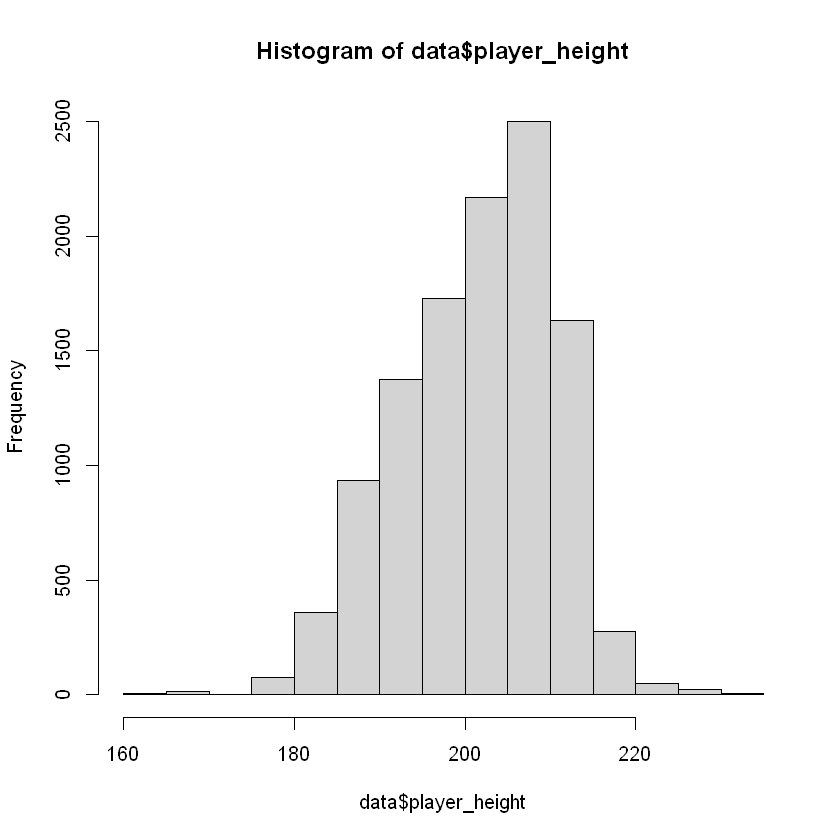

In [17]:
# a.1
data <- read.csv("res/all_seasons.csv");
hist(data$player_height);

In [18]:
# a.2

x_bar <- mean(data$player_height);
x_bar

[1] 200.8128

In [19]:
# a.3

n <- length(data$player_height);
standard_dev <- sd(data$player_height);
a <- 0.05;
me <- qt(1 - a / 2, n - 1) * standard_dev / sqrt(n);

c(x_bar - me, x_bar + me);

[1] 200.6422 200.9835

b. Asymptotic CI (20 points)  
Assume we are given a Random Sample from the Family of Parametric Distributions given
by their PDFs
$$ f (x|\lambda) = \lambda · x^{\lambda−1}, x \in [0, 1],\ \ \ and\ \ \ f(x|\lambda) = 0, x \notin [0, 1] $$
1. Find the Fisher Information for λ;
2. Find the MLE Estimator for λ, based in the Random Sample X1, X2, ..., Xn;
3. Check if MLE is Consistent;
4. Construct an Asymptotic CI of Level 1 − α for the λ in this Model.

Answer:  
1. $$ I(\lambda) = -\Epsilon \left ( ln''(f(x|\lambda)) \right ) $$

$$ ln(f(x|\lambda)) = ln(\lambda) + (\lambda−1)ln(x) $$

$$ ln'(f(x|\lambda)) = \frac {1}{\lambda} + ln(x) $$

$$ ln''(f(x|\lambda)) = -\frac {1}{\lambda^2} $$

$$ I(\lambda) = -\Epsilon \left ( -\frac {1} {\lambda^2} \right ) =  \frac {1} {Var(\lambda) + E(\lambda)^2} $$

2. $$ l = nln(\lambda) + (\lambda - 1) \sum_{i=1}^{n}ln(x_i) $$

$$ l' = \frac {n}{\lambda} + \sum_{i=1}^{n}ln(x_i) $$

$$ l' = 0 \Leftrightarrow \lambda = -\frac {n}{\sum_{i=1}^{n}x_i} $$

$$ l'' = -\frac {n}{\lambda^2} < 0 $$

$$ \hat{\lambda}^{MLE} = -\frac {n}{\sum_{i=1}^{n}x_i} $$

3. $$ E(\lambda) = \int_{0}^{1} xf(x|\lambda) dx = \frac{\lambda x^{\lambda + 1}}{\lambda+1}|^{1}_0 = 1 - \frac{1}{\lambda + 1} $$

$$ \bar{X} = 1 - \frac{1}{\lambda + 1} $$

$$ \lambda = \frac{1}{\bar{X} - 1} - 1 \rightarrow \frac{1}{1 - \frac{1}{\lambda + 1} - 1} - 1= \lambda \Rightarrow Consistent$$

4. $$ ACI\ for\ \lambda = -\frac {n}{\sum_{i=1}^{n}x_i} \pm z_{1-a/2}\sqrt{\frac{Var(\hat{\lambda}) + E(\hat{\lambda})^2}{n}} $$

### Problem 3: Hypothesis Testing  
**Significance and Power (15 points)**  
Assume x<sub>1</sub>, ..., x<sub>100</sub> is an Observation from the model N(μ, 4). We want to test the hypothesis
$$ H_0: μ = 0\ \ \  vs\ \ \ H_1: μ = 1 $$
We chose the rejection region 
$$ RR = \{ \bar{X} > 0.5\} $$
The Sample Mean of our Observations x<sub>k</sub> is 0.32.
1. What is the Decision of the Test?

Answer:  
We fail to reject the Null Hypothesis.

2. Calculate the Type I Error Probability;

Answer:  
$$ \bar{X} \sim N \left (\mu, \frac{2^2}{\sqrt{n}} \right ) = N\left(\mu, \frac{2}{5}\right) $$


$$ P(Type\ I\ Error) = a = 1 - F_{\bar{X}|\mu = 0}(0.5)  $$

$$ a = 1 - F_{z}\left (\frac{0.5}{\sqrt{2/5}} \right ) \approx 0.3 $$

3. Calculate the Type II Error Probability

Answer:  
$$ P(Type\ II\ Error) = b = F_{\bar{X}|\mu = 1}(0.5) $$

$$ b = F_{z}\left (-\frac{0.5}{\sqrt{2/5}} \right ) \approx 0.3 $$

4. Calculate the power of the test.

Answer:  
$$ Power = 1 - b = 0.7 $$

### Problem 4: Testing in Practice
a. Testing for the Normal Mean (10 points)  
On a new highway, the speed limit is set to 70 km/h. The police department is claiming that
the average speed is higher than 70 km/h on that highway, and wants to put an aragachaph.
In support of their claim, the department is providing data from randomly chosen 10 cars:
the recorded speeds are (in km/h):
$$ 66, 79, 80, 74, 81, 79, 65, 78, 77, 69 $$
s this data providing a sufficient evidence against the Hypothesis that the average speed
is 70 km/h? Use 1% significance level. You can assume that the car speeds are normally
distributed.
1. Do the Testing by hand, i.e., by calculating Test Statistics value and comparing with Critical Values;

Answer:  
$$ a = 0.01 $$
$$ H_0: μ = 70\ \ \  vs\ \ \ H_1: μ > 70 $$
$$ \bar{X} = sum(66, 79, 80, 74, 81, 79, 65, 78, 77, 69) - / 10 = 74.8 $$

$$ sr^2(x) = (74.8 - 66)^2 + (74.8 - 79)^2 + (74.8 - 80)^2 + (74.8 - 74)^2 + $$
$$ + (74.8 - 81)^2 + (74.8 - 79)^2 + (74.8 - 65)^2 + (74.8 - 78)^2 + (74.8 - 77)^2 + (74.8 - 69)^2 = 323.6 $$

$$ S = \sqrt(323.6 / 9 )\approx 6 $$

$$ t = \frac{74.8 - 70}{6/\sqrt{9}} \approx 2.4 $$

$$ t_{1-\alpha} = 2.821 $$

$$ t < t_{1-\alpha} \Rightarrow We\ fail\ to\ reject\ H_0 $$

2. (R) Do the Testing using CIs;

Answer:  

In [33]:
a <- 0.01
x <- c(66, 79, 80, 74, 81, 79, 65, 78, 77, 69);
print(c("t at 1 - a", qt(1 - a, 9)));
print(c(
    "t-value",
    toString(t.test(x, mu = 70, alternative = "greater")$statistic)
));

[1] "t at 1 - a"       "2.82143792502581"
[1] "t-value"          "2.53138519416467"


t-value < t<sub>1 - a</sub>, so we fail to reject the hypothesis

3. (R) Do the Testing using p-Values.

Answer:  

In [37]:
t.test(x, mu = 70, alternative = "greater")$p.value

[1] 0.0160811

p-value > a, so we fail to reject the hypothesis

b. Testing for the Proportion (7 points)  
A company claims that 83% of customers buying their product are satisfied with that
product. Assume we have a sample of 74 persons, chosen randomly, who bought their
product, and only 52 of them are satisfied. Perform a Test of Significance Level 0.05 to see if
the data is supporting the company’s claim.

Answer:  
$$ \bar{X} = 52/74 = 0.7;\ \ \ \ a = 0.05 $$
$$ H_0: p = 0.83\ \ \ H_1: p \neq 0.83 $$
$$ W = \frac{0.7 - 0.83}{\sqrt{\frac{0.7 * 0.3}{74}}} \approx - 0.007 $$
$$ z_{1-a/2} \approx 2.75 $$

$$ |W| < z_{1-a/2} \Rightarrow We\ fail\ to\ reject\ H_0 $$

c. Z-test (7 points)  
Every day I feed my cat Wolfie with dry food. The daily portion needs to be 60 grams, but,
of course, the actual portion weight is never equal to 60. I want to see if I am underfeeding
my cat. To that end, I have weighted the portions for 2 weeks:
```
[1] 66.8 60.9 62.2 59.0 55.1 63.8 59.1 60.0 68.3 56.7 57.6 56.1 59.0 61.5
```
Assuming that the distribution of daily portions is Normal with standard deviation 5, test
the Hypothesis that I am underfeeding Wolfie.

Answer:  
$$ \bar{X} \approx 60.44 $$
Since the mean of our sample is 60.44, there is no point in testing the hypothesis, we cannot reject that the cat is being fed an adequate amount (60 grams). Point `d` of this problem tests this hypothesis.

d. (R) Z-test (8 points)  
Write the z.test function in the analogue of t.test. Test your function on some Data.

Answer:  

In [3]:
z_test <- function(x, sigma, mu, conf_level = 0.95, alternative = "two.sided") {
    a <- 1 - conf_level

    if (alternative == "two.sided") {
        z <- qnorm(1 - a / 2);
    } else if (alternative == "less") {
        z <- qnorm(1 - a);
    } else if (alternative == "greater") {
        z <- qnorm(a);
    } else {
        stop("Invalid alternative");
    }

    n <- length(x);

    z_value <- (mean(x) - mu) / (sigma / sqrt(n));

    result <- list(
        statistic = z_value,
        p.value = pnorm(z_value),
        conf.int = c(
            mean(x) - z * sigma / sqrt(n),
            mean(x) + z * sigma / sqrt(n)
        ),
        estimate = mean(x),
        null.value = mu,
        alternative = alternative
    );

    return(result);
}

z_test(c(66.8, 60.9, 62.2, 59.0,
    55.1, 63.8, 59.1, 60.0, 68.3,
    56.7, 57.6, 56.1, 59.0, 61.5),
    sigma = 5, mu = 60, alternative = "less")

$statistic
[1] 0.3260587

$p.value
[1] 0.62781

$conf.int
[1] 58.23769 62.63374

$estimate
[1] 60.43571

$null.value
[1] 60

$alternative
[1] "less"